#Crop Yield Estimation  

**Dataset:**  
 [Kaggle- Agriculture Crop Yield](https://www.kaggle.com/datasets/samuelotiattakorah/agriculture-crop-yield)   


**Group Members:**
> - Angelica Moreno
> - Arunima Sen
> - Ethel Ogallo















## **Introduction**  
This section introduces the data i.e
 * how and why was the data collected? what is the application domain?  
 * what is the learning task you will study?  
 * what are the features (meaning, types and categories if it applies)?  
 * what is the output variable (meaning, type and categories if it applies)?  



The table belows shows the raw dataset

In [ ]:
# Read the csv
import pandas as pd

# Read the csv
data = pd.read_csv("./crop_yield.csv")
data

,Region,Soil_Type,Crop,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Weather_Condition,Days_to_Harvest,Yield_tons_per_hectare
0,West,Sandy,Cotton,897.077239,27.676966,False,True,Cloudy,122,6.555816
1,South,Clay,Rice,992.673282,18.026142,True,True,Rainy,140,8.527341
2,North,Loam,Barley,147.998025,29.794042,False,False,Sunny,106,1.127443
3,North,Sandy,Soybean,986.866331,16.644190,False,True,Rainy,146,6.517573
4,South,Silt,Wheat,730.379174,31.620687,True,True,Cloudy,110,7.248251
...,...,...,...,...,...,...,...,...,...,...
999995,West,Silt,Rice,302.805345,27.987428,False,False,Sunny,76,1.347586
999996,South,Chalky,Barley,932.991383,39.661039,True,False,Rainy,93,7.311594
999997,North,Peaty,Cotton,867.362046,24.370042,True,False,Cloudy,108,5.763182
999998,West,Silt,Wheat,492.812857,33.045505,False,False,Sunny,102,2.070159


> **How and why was the data collected? what is the application domain?**  
> This dataset contains synthetically generated agricultural samples created for the purpose of practicing machine learning models, specifically for predicting crop yield. Although it is not collected from real-world field measurements or agricultural study, the data is based on commonly understood agricultural factors that influence crop yield.  
> **What is the learning task you will study?**   
> The learning task for this dataset is *supervised regression*.

**Dataset Features**

In [4]:
# inspect data columns and type
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 10 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   Region                  1000000 non-null  object 
 1   Soil_Type               1000000 non-null  object 
 2   Crop                    1000000 non-null  object 
 3   Rainfall_mm             1000000 non-null  float64
 4   Temperature_Celsius     1000000 non-null  float64
 5   Fertilizer_Used         1000000 non-null  bool   
 6   Irrigation_Used         1000000 non-null  bool   
 7   Weather_Condition       1000000 non-null  object 
 8   Days_to_Harvest         1000000 non-null  int64  
 9   Yield_tons_per_hectare  1000000 non-null  float64
dtypes: bool(2), float64(3), int64(1), object(4)
memory usage: 62.9+ MB
None


In [5]:
# filter out categorical columns
categorical_data = ['Region', 'Soil_Type', 'Crop', 'Fertilizer_Used', 'Irrigation_Used', 'Weather_Condition']

# print the unique categories of each column
for col in categorical_data:
    print(f"{col}: {data[col].unique()}\n")

Region: ['West' 'South' 'North' 'East']

Soil_Type: ['Sandy' 'Clay' 'Loam' 'Silt' 'Peaty' 'Chalky']

Crop: ['Cotton' 'Rice' 'Barley' 'Soybean' 'Wheat' 'Maize']

Fertilizer_Used: [False  True]

Irrigation_Used: [ True False]

Weather_Condition: ['Cloudy' 'Rainy' 'Sunny']



> **Categorical variables:**  
> *   Region - The geographical region where the crop is grown (West, South, North, East).
> *   Soil Type - The type of soil (Sandy,Clay,Loam,Silt,Peaty,Chalky) .
> *   Crop - The type of crop grown (Cotton, Rice,Barley,Soybean, Wheat, Maize).
> *   Weather Condition - The predominant weather condition (Cloudy,Rainy,Sunny).
> *   Fertilizer_Used - Indicates whether fertilizer was applied (False,True).
> *   Irrigation_Used - Indicates whether irrigation was used (True, False ).  

> **Numerical variables:**
> *   Rainfall_mm - Rainfall during the crop growth period in mm
> *   Temperature_Celsius - Average temperature during the crop growth period in celsius
> *   Days_to_Harvest - The number of days taken for the crop to be harvested after planting.  

> **Output variable**    
> - Yield_tons_per_hectare - A numerical continuous variable that is the total crop yield produced, measured in tons per hectare.



## **Exploratory Data Analysis**
This section describes the dataset using figures and descriptive statistics

The table below gives an overview of the summary statistics (average, min, max, std etc) of the numerical features: `Rainfall_mm`,`Temperature_Celsius`, `Days_to_Harvest` and `Yield_tons_per_hectare`

In [6]:
# descriptive statistical analysis for numerical data
data.describe()

,Rainfall_mm,Temperature_Celsius,Days_to_Harvest,Yield_tons_per_hectare
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,549.981901,27.504965,104.495025,4.649472
std,259.851320,7.220608,25.953412,1.696572
min,100.000896,15.000034,60.000000,-1.147613
25%,324.891090,21.254502,82.000000,3.417637
50%,550.124061,27.507365,104.000000,4.651808
75%,774.738520,33.753267,127.000000,5.879200
max,999.998098,39.999997,149.000000,9.963372


The table below gives a descriptive statitsical summary of the categorical features: `Region`,`Soil_Type`,`Crop`,`Fertilizer_used`,`Irrigation_Used`,`Weather_Condition`

In [7]:
# descriptive stats for categorical data
data.describe(include=['object','bool'])

,Region,Soil_Type,Crop,Fertilizer_Used,Irrigation_Used,Weather_Condition
count,1000000,1000000,1000000,1000000,1000000,1000000
unique,4,6,6,2,2,3
top,North,Sandy,Maize,False,False,Sunny
freq,250173,167119,166824,500060,500509,333790


**comment:**  
Based on the summary statistics above , we can observe that there are no null or missing values in the numerical features. We can see in the target variable `Yield_tons_per_hectare` there are negative values that need to be investigated further.

### **Figures describing features**  
Visualizations showing the relationship and the distribution of the features in the dataset.  

The figure below shows the distribution of crop yield across all the observations.

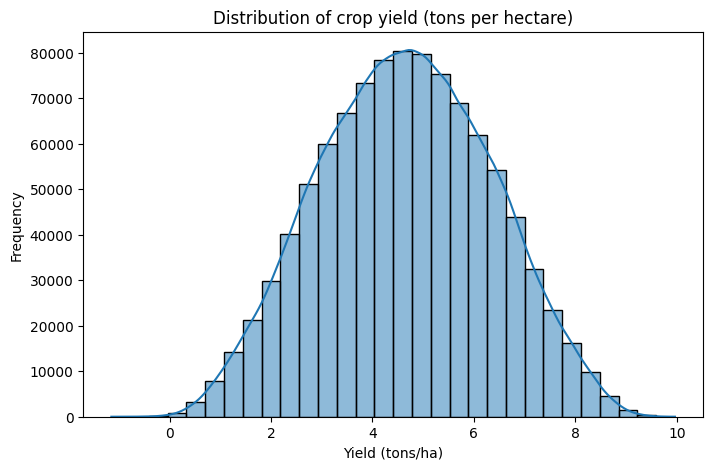

In [8]:
# Distribution of crop yield variable
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.histplot(data['Yield_tons_per_hectare'], kde=True, bins=30)
plt.title("Distribution of crop yield (tons per hectare)")
plt.xlabel("Yield (tons/ha)")
plt.ylabel("Frequency")
plt.show()

**comment**  
The distribution is continuous and approximately normal (bell-shaped), with majority of the data around the mean. We also observe slight deviations such as a small tail below zero which should be impossible for yield but may be data noise or error.

The figure below shows a pairwise correlation matrix that shows the relationship between all the numerical features.

<Axes: >

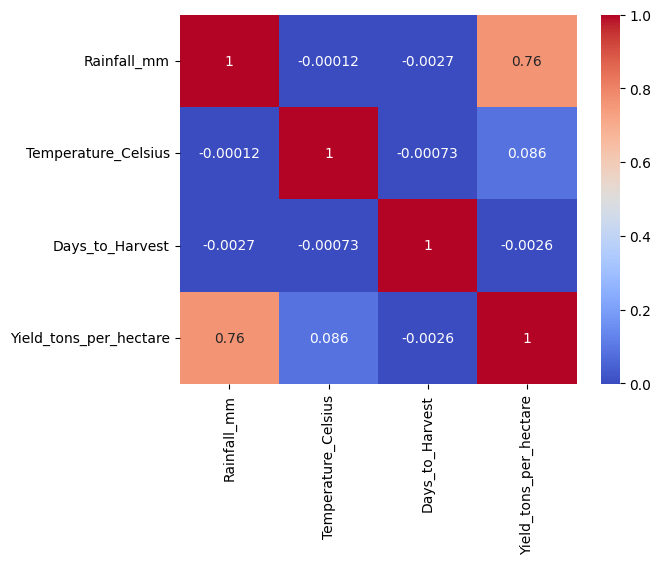

In [9]:
# visualizations of the relationships of the numerical features
numeric_data = ["Rainfall_mm", "Temperature_Celsius", "Days_to_Harvest", "Yield_tons_per_hectare"]
sns.heatmap(data[numeric_data].corr(), annot=True, cmap="coolwarm")

**comment:**  
There is a strong positive correlation of 0.76. This suggests that higher rainfall tends to be associated with a higher yield. Temperature and days to harvest have a weaker correlation to yield.

The figure below shows a boxplot showing the distribution of crop yield per crop type.

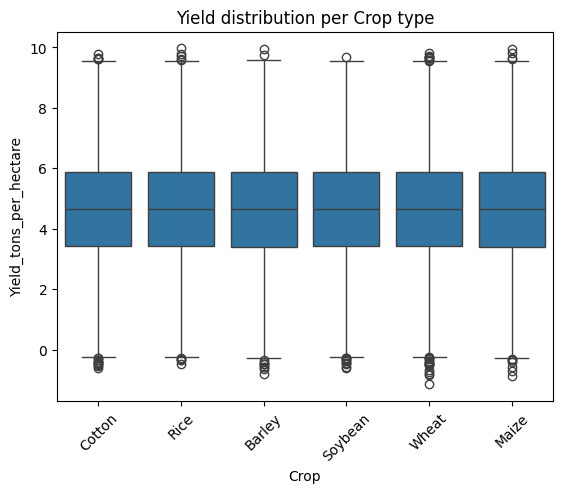

In [10]:
# distribution of yield per crop type
sns.boxplot(data, x='Crop', y='Yield_tons_per_hectare')
plt.xticks(rotation=45)
plt.title("Yield distribution per Crop type")
plt.show()


**comment**  
This distribution is balanced per category however there are outliers in each of the crop type. There are several negative observations and given that crop yield cannot be negative this should be investigated and dealt with.

The figure below shows the distribution of crop yield per region

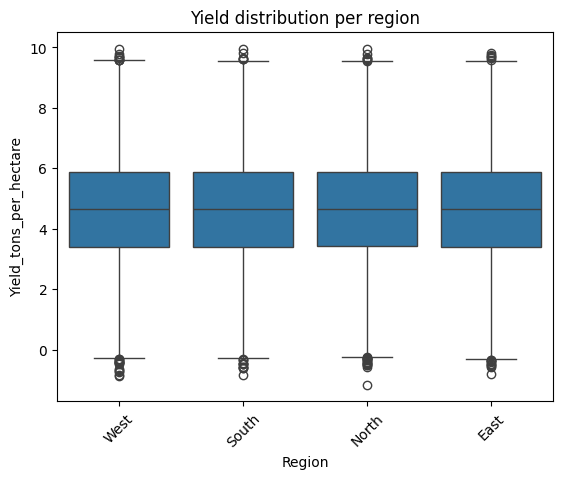

In [11]:
# distribution of yield per region
sns.boxplot(data, x='Region', y='Yield_tons_per_hectare')
plt.xticks(rotation=45)
plt.title("Yield distribution per region")
plt.show()

The distribution per region is also balanced and the negative outliers are also observed in this conntext.

## **Preprocessing**






**Managing outliers or missing values**  
We note that this data does not have missing values from the statistics. It however has some outliers in the `yield_tons_per_hectare` variable as seen from the box plot previously.

In [12]:
# missing values
data.isnull().sum()

Region                    0
Soil_Type                 0
Crop                      0
Rainfall_mm               0
Temperature_Celsius       0
Fertilizer_Used           0
Irrigation_Used           0
Weather_Condition         0
Days_to_Harvest           0
Yield_tons_per_hectare    0
dtype: int64

**comment:**  
As earlier observed the data does not have missing values in any of the features

The table below shows the observations with a negative yield value

In [13]:
# number of negatives in yield_tons_per_hectare
data[data['Yield_tons_per_hectare'] < 0]

,Region,Soil_Type,Crop,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Weather_Condition,Days_to_Harvest,Yield_tons_per_hectare
756,East,Peaty,Cotton,101.019421,33.804131,False,False,Rainy,117,-0.007103
7799,South,Chalky,Rice,108.804894,18.004082,False,False,Sunny,86,-0.061283
8421,East,Chalky,Soybean,168.120735,38.473430,False,False,Cloudy,111,-0.119911
9553,North,Silt,Wheat,156.607973,16.610257,False,False,Sunny,129,-0.193093
15435,South,Chalky,Maize,177.481344,27.719742,False,False,Sunny,94,-0.009811
...,...,...,...,...,...,...,...,...,...,...
975666,South,Clay,Barley,116.114046,16.257818,False,False,Sunny,70,-0.471038
982738,West,Loam,Wheat,235.792353,31.699429,False,False,Sunny,68,-0.255772
987054,West,Peaty,Barley,100.467398,15.735951,False,False,Rainy,96,-0.120282
995837,East,Chalky,Maize,105.575189,15.864764,False,False,Rainy,111,-0.051633


**comment:**  
The negative yield are 231 observations which is about 0.02% of the data given the 1,000,000 data points in the full dataset

To address the negative outliers we deleted them as they could be erroneous data within the data points. Crop yield cannot be negative unless comparing different years' production which is not the case in this context

In [14]:
# delete the ouliers (231 data points)
data2 = data[data['Yield_tons_per_hectare'] >= 0]


**comment:**  
We only deleted the negative values of crop yield , we also have some *outliers* on the positive end however these could be reralistic i.e. high yield due to optimal conditions such as high precipitation or best soil type etc

## **Evaluation protocol**

### **Revised Strategy**

 We adopted a hold-out + cross-validation strategy:
 1. **Hold-out** We held out 20% of data as a test set ***(stratified by region)*** to obtain an unbiased estimate of generalization performance.  
 **Justification:** Given the ~1 million data points, 20% test provides sufficient data to evaluate generalization. Stratified sampling ensures all geographic regions are proportionally represented in both  sets.
 2. **Cross Validation:** We applied stratified cross-validation on the remaining 80% for hyperparameter tuning and model selection.  
 **Justification:** This approach ensures that the dataset still maintains a balanced representation of the region even when tuning hyperparameters.   
  
 The final model is trained on the full 80% using the best hyperparameters identified through CV, then evaluated once on the held-out test set.

### **Metrics - Revised**  
 In this study, we will evaluate the performance of our crop yield estimation model using two commonly used regression metrics: Root Mean Squared Error (RMSE),Mean Absolute Error (MAE) and R².  
 **[1] RMSE** provides an indication of the model’s prediction error in the same units as the target variable and is particularly sensitive to large errors.  
 **[2] MAE**, on the other hand, measures the average magnitude of the errors regardless of their direction and is less influenced by outliers.  
 **[3] R²** the coefficient of determination explains how much of the variation in the target variable can be explained by the model. R² ranges from **-infinity to 1**  with **1** = perfect prediction (model predicts exactly the true values); **0** = model is no better than predicting the mean of the target; **Negative** = model is worse than just predicting the mean.

## **Data Splitting**   
Before we begin fitting the model we split the data into training and test sets using stratified sampling by region.

In [15]:
from sklearn.model_selection import train_test_split

data3 = data2.drop('Yield_tons_per_hectare', axis=1)
target = data2['Yield_tons_per_hectare']

# Split the data using STRATIFIED sampling by Region
X_train, X_test, Y_train, Y_test = train_test_split(
    data3,
    target,
    test_size=0.2,
    random_state=42,
    shuffle=True,
    stratify=data3['Region']  # NEW: Stratify by Region
)

# Save the original 'Region' column for stratification in CV
regions = X_train['Region'].copy()

print("Region distribution in training set:")
print(X_train['Region'].value_counts(normalize=True))
print("\nRegion distribution in test set:")
print(X_test['Region'].value_counts(normalize=True))

Region distribution in training set:
Region
North    0.250169
West     0.250072
South    0.250059
East     0.249700
Name: proportion, dtype: float64

Region distribution in test set:
Region
North    0.250173
West     0.250073
South    0.250058
East     0.249697
Name: proportion, dtype: float64


**comment:**  
We split the dataset using stratified sampling by Region to ensure that each geographic region is proportionally represented in both the training and test sets preventing bias in model evaluation.

## **Feature Engineering**  
**Feature Scaling and Categorical encoding**  
 We normalize the numerical features (Rainfall_mm, Temperature_Celsius, and Days_to_Harvest) because they are measured on different scales and units (e.g., rainfall in mm vs. temperature in degrees Celsius).  
This will ensure that features such as rainfall that have a larger numerical range do not overshadow the rest in the model training.  
 We will also encode the categorical features to enable the models to interpret them, as most algorithms require numerical input.
 * Nominal Features (`Region`, `Soil_Type`, `Crop`, and `Weather_Condition`): We will use One-Hot Encoding  because these categories are not ordered.
 * Binary Features (`Fertilizer_used` and `Irrigation_Used`): Since these features are simple True/False, we will use a binary mapping (True=1, False=0)


In [16]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Define the feature groups
numeric_features = ['Rainfall_mm', 'Temperature_Celsius', 'Days_to_Harvest']
nominal_features = ['Region', 'Soil_Type', 'Crop', 'Weather_Condition']
binary_features = ['Fertilizer_Used', 'Irrigation_Used']

# transformer pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), nominal_features),
        ('bin', 'passthrough', binary_features)  # keep binary columns as they are
    ]
)

# Fit on training data and transform both sets
X_train_ = preprocessor.fit_transform(X_train)
X_test_ = preprocessor.transform(X_test)

# Get encoded column names
encoded_nominal_cols = preprocessor.named_transformers_['cat'].get_feature_names_out(nominal_features)

# Combine column names
all_columns = numeric_features + list(encoded_nominal_cols) + binary_features

# Convert to DataFrame
X_train = pd.DataFrame(X_train_, columns=all_columns, index=X_train.index)
X_test = pd.DataFrame(X_test_, columns=all_columns, index=X_test.index)

print("\n---Training data after preprocessing---")
print("Shape:", X_train.shape)
print(X_train.head())



---Training data after preprocessing---
Shape: (799815, 24)
        Rainfall_mm  Temperature_Celsius  Days_to_Harvest  Region_East  \
67110     -0.842443            -0.560053        -1.059200          0.0   
256089    -0.514794            -0.152093         1.291262          0.0   
758491     1.385094             0.977473        -0.442686          1.0   
705578    -0.681220            -0.044716        -1.637183          0.0   
9025      -1.036053            -0.683357         0.405022          0.0   

        Region_North  Region_South  Region_West  Soil_Type_Chalky  \
67110            0.0           0.0          1.0               0.0   
256089           0.0           1.0          0.0               1.0   
758491           0.0           0.0          0.0               1.0   
705578           1.0           0.0          0.0               0.0   
9025             0.0           0.0          1.0               0.0   

        Soil_Type_Clay  Soil_Type_Loam  ...  Crop_Cotton  Crop_Maize  \
67110  

**comment:**  
After preprocessing the data is fully numeric ready for ML model with:
- Numeric features are standardized (mean ~0, variance ~1), ensuring all scales are comparable.
- Categorical features are one-hot encoded, expanding the feature set from 9 to 24 columns.
- Binary features remain as 0 or 1 integers.


## **ML Algorithms**   


We first fit each model using default hyperparameters to baseline understanding on how the models capture the patterns in the data and compare them against the Dummy baseline. We will calculate training and testing error to assess model performance.

**Principles:**  


1.  **Dummy Regressor -** A baseline model that predicts a constant value (e.g., the mean of the target variable). It provides a reference point to determine whether more complex models achieve meaningful improvement.
2.  **Ridge Regression -** A linear regression model with L2 regularization that penalizes large coefficients. This helps to reduce overfitting and handle multicollinearity among predictors, making the model more stable when features are correlated.
3. **Histogram-based Gradient Boosting Regression -** An ensemble method that builds a sequence of shallow decision trees using histogram-based splits, where each new tree corrects the residuals (errors) of the previous ensemble.
4. **Random Forest -** An ensemble learning method that builds multiple decision trees on random subsets of the data and features, then averages their predictions to reduce variance and improve generalization.








In [17]:
## Baseline model - dummy regressor
from sklearn.dummy import DummyRegressor
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# fit the model
dummy = DummyRegressor(strategy='mean')
dummy.fit(X_train, Y_train)

# Predict
y_pred_train1 = dummy.predict(X_train)
y_pred_test1 = dummy.predict(X_test)

# Assess model
r2_train1 = r2_score(Y_train, y_pred_train1)
r2_test1 = r2_score(Y_test, y_pred_test1)

rmse_train1 = np.sqrt(mean_squared_error(Y_train, y_pred_train1))
rmse_test1 = np.sqrt(mean_squared_error(Y_test, y_pred_test1))

print("Dummy Regressor (Baseline)")
print(f"Train R²: {r2_train1:.4f}, Test R²: {r2_test1:.4f}")
print(f"Train RMSE: {rmse_train1:.4f}, Test RMSE: {rmse_test1:.4f}")


Dummy Regressor (Baseline)
Train R²: 0.0000, Test R²: -0.0000
Train RMSE: 1.6952, Test RMSE: 1.6949


**comment:**  
From the training and test set metrics, we observe that the Dummy Regressor baseline gives an R² of ~0, meaning the model only predicts the mean yield and does not capture any patterns in the data.  
The RMSE values (≈1.695 on train and test) indicate that, on average, the predictions deviate from the true yields by about 1.7 tons per hectare.

In [18]:
## Ridge regressor withh default parameters
from sklearn.linear_model import Ridge

# Fit the model
ridge = Ridge()
ridge.fit(X_train, Y_train)

# Predict
y_pred_train2 = ridge.predict(X_train)
y_pred_test2 = ridge.predict(X_test)

# Assess model
r2_train2 = r2_score(Y_train, y_pred_train2)
r2_test2 = r2_score(Y_test, y_pred_test2)

rmse_train2 = np.sqrt(mean_squared_error(Y_train, y_pred_train2))
rmse_test2 = np.sqrt(mean_squared_error(Y_test, y_pred_test2))

print("Ridge Regressor")
print(f"Train R²: {r2_train2:.4f}, Test R²: {r2_test2:.4f}")
print(f"Train RMSE: {rmse_train2:.4f}, Test RMSE: {rmse_test2:.4f}")


Ridge Regressor
Train R²: 0.9129, Test R²: 0.9132
Train RMSE: 0.5003, Test RMSE: 0.4993


/opt/anaconda3/envs/satimg-env/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/anaconda3/envs/satimg-env/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/anaconda3/envs/satimg-env/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/opt/anaconda3/envs/satimg-env/lib/python3.10/site-packages/sklearn/linear_model/_base.py:280: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/opt/anaconda3/envs/satimg-env/lib/python3.10/site-packages/sklearn/linear_model/_base.py:280: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/opt/anaconda3/envs/satimg-env/lib/python3.10/site-packages/sklearn/linear_model/_base.py:280: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self

**comment:**  
The Ridge Regression model achieves a high R² of 0.91 on both the training and test sets. The RMSE values (~0.50 tons per hectare) show that the predictions are, on average, within 0.5 tons per hectare of the true yields.   
Overall, with default parameters, the model captures most patterns in the data and generalizes well to unseen data.

In [19]:
## Histogram based gradient boosting regressor with default parameters
from sklearn.ensemble import HistGradientBoostingRegressor

# Fit model
hgb_reg = HistGradientBoostingRegressor(random_state=42)
hgb_reg.fit(X_train, Y_train)

# Predict
y_pred_train4 = hgb_reg.predict(X_train)
y_pred_test4 = hgb_reg.predict(X_test)

# Assess model
r2_train4 = r2_score(Y_train, y_pred_train4)
r2_test4 = r2_score(Y_test, y_pred_test4)

rmse_train4 = np.sqrt(mean_squared_error(Y_train, y_pred_train4))
rmse_test4 = np.sqrt(mean_squared_error(Y_test, y_pred_test4))

print("HistGradientBoosting")
print(f"Train R²: {r2_train4:.4f}, Test R²: {r2_test4:.4f}")
print(f"Train RMSE: {rmse_train4:.4f}, Test RMSE: {rmse_test4:.4f}")

HistGradientBoosting
Train R²: 0.9132, Test R²: 0.9130
Train RMSE: 0.4995, Test RMSE: 0.4999


**comment:**  
The HistGradientBoosting model achieves an R² of about 0.91 on both the training and test sets The RMSE values (~0.50 tons per hectare) suggest that, on average, predictions deviate by about 0.5 tons per hectare from the actual values.
Overall, the model demonstrates a strong fit to the data and generalizes effectively to unseen samples.

In [20]:
# Random forest regressor based on default parameters
from sklearn.ensemble import RandomForestRegressor

# Fit the model
rf_reg = RandomForestRegressor(random_state=42, n_jobs=-1)
rf_reg.fit(X_train, Y_train)

# Predict
y_pred_train5 = rf_reg.predict(X_train)
y_pred_test5 = rf_reg.predict(X_test)

# Assess model
r2_train5 = r2_score(Y_train, y_pred_train5)
r2_test5 = r2_score(Y_test, y_pred_test5)

rmse_train5 = np.sqrt(mean_squared_error(Y_train, y_pred_train5))
rmse_test5 = np.sqrt(mean_squared_error(Y_test, y_pred_test5))

print("Random Forest")
print(f"Train R²: {r2_train5:.4f}, Test R²: {r2_test5:.4f}")
print(f"Train RMSE: {rmse_train5:.4f}, Test RMSE: {rmse_test5:.4f}")

Random Forest
Train R²: 0.9871, Test R²: 0.9080
Train RMSE: 0.1928, Test RMSE: 0.5141


**comment:**  
The Random Forest model fits the training data very closely (R² ≈ 0.987, RMSE ≈ 0.19), indicating it captures almost all patterns in the training set. On the test set, R² drops slightly and RMSE increases to ~0.51, showing that the model generalizes well but exhibits a small amount of overfitting.  
Overall, with default parameters, Random Forest provides strong predictive performance.

##**Hyperparameter Tuning**

We have fitted all models using their default hyperparameters and evaluated them on the training and test sets to get an impression of their performance in terms of R² and RMSE allowing us to compare how well each model captures patterns in the data and generalizes to unseen yields.  
In the next step, we will perform hyperparameter tuning, adjusting parameters such as regularization strength, tree depth, number of estimators, and learning rate depending on the model. Stratified Cross-validation will be used during tuning to ensure that the data in the folds maintain the distribution per region.  
Once the best hyperparameters are identified, each model will be retrained on the full training set and evaluated on the test set to report the final, unbiased performance metrics.

### **Ridge Regression**
For Ridge Regression, we tune the alpha parameter, which controls the strength of L2 regularization applied to the model coefficients. Alpha determines the trade-off between fitting the training data well and keeping the model coefficients small to prevent overfitting. We use `RandomizedSearchCV` to efficiently explore a wide range of alpha values from 0.001 to 1000 on a logarithmic scale, testing 30 different parameter settings. Lower alpha values result in minimal regularization (closer to standard linear regression), while higher values impose stronger penalties on large coefficients, leading to simpler models. The search uses 5-fold stratified cross-validation based on geographic region to ensure robust performance estimation across all areas, with the final alpha selected based on the highest mean cross-validated R² score

Fitting 5 folds for each of 30 candidates, totalling 150 fits


/opt/anaconda3/envs/satimg-env/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/anaconda3/envs/satimg-env/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/anaconda3/envs/satimg-env/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/opt/anaconda3/envs/satimg-env/lib/python3.10/site-packages/sklearn/linear_model/_base.py:280: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/opt/anaconda3/envs/satimg-env/lib/python3.10/site-packages/sklearn/linear_model/_base.py:280: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/opt/anaconda3/envs/satimg-env/lib/python3.10/site-packages/sklearn/linear_model/_base.py:280: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self

Hyperparameter tuning completed in 6.95 seconds (0.12 minutes)

Best alpha: 2.023590
Best CV R² score: 0.9129


/opt/anaconda3/envs/satimg-env/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/anaconda3/envs/satimg-env/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/anaconda3/envs/satimg-env/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


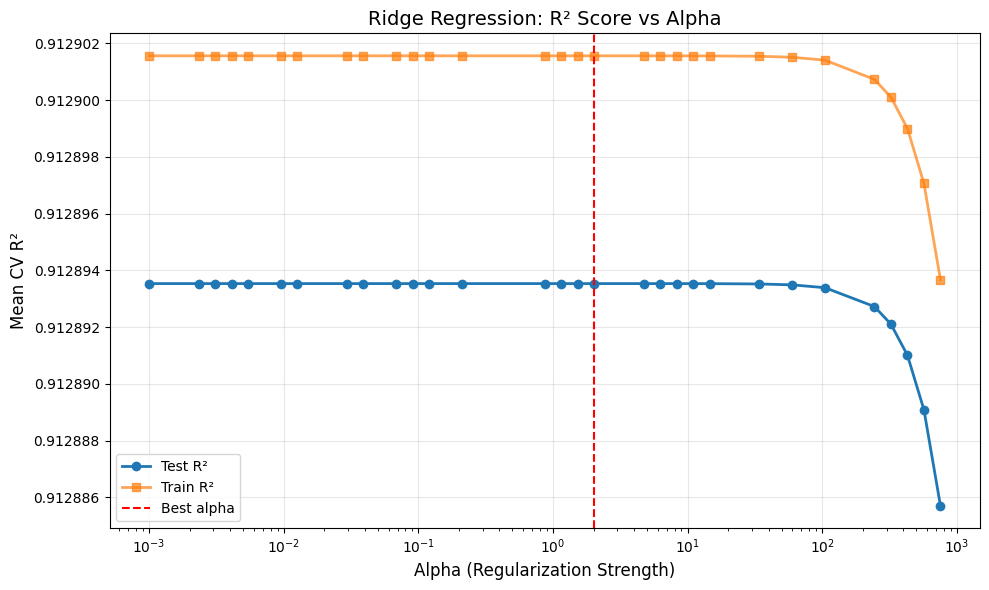


Training final model with optimized parameters...
Final model training completed in 0.04 seconds

FINAL RIDGE REGRESSION MODEL PERFORMANCE
Training R²:   0.9129
Test R²:       0.9132
Training RMSE: 0.5003 tons/hectare
Test RMSE:     0.4993 tons/hectare
Training MAE:  0.3992 tons/hectare
Test MAE:      0.3987 tons/hectare
------------------------------------------------------------
Tuning Time:   6.95 seconds (0.12 minutes)
Training Time: 0.04 seconds
Total Time:    6.99 seconds

Comparison with Default Ridge Model:
Default Ridge Test R²:  0.9132
Tuned Ridge Test R²:    0.9132
Improvement:            -0.00%


/opt/anaconda3/envs/satimg-env/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/anaconda3/envs/satimg-env/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/anaconda3/envs/satimg-env/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/opt/anaconda3/envs/satimg-env/lib/python3.10/site-packages/sklearn/linear_model/_base.py:280: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/opt/anaconda3/envs/satimg-env/lib/python3.10/site-packages/sklearn/linear_model/_base.py:280: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/opt/anaconda3/envs/satimg-env/lib/python3.10/site-packages/sklearn/linear_model/_base.py:280: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self

In [21]:
# Ridge Regression Hyperparameter Tuning
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold, PredefinedSplit
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt
import time

# Parameter chosen to be tuned based on scikit documentation:
# alpha: Regularization strength. Higher values = stronger regularization (simpler model)

# Create stratified cross-validation based on Region
cv_skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Generate fold indices based on 'regions'
fold_indices = list(cv_skf.split(X_train, regions))

# Create an array to indicate the fold for each sample
fold_numbers = np.zeros(len(regions))
for fold, (train_idx, val_idx) in enumerate(fold_indices):
    fold_numbers[val_idx] = fold

# Create a PredefinedSplit object
cv = PredefinedSplit(test_fold=fold_numbers)

# Define Ridge model
ridge_model = Ridge(random_state=42)

# Define parameter distribution for alpha
param_dist = {
    'alpha': np.logspace(-3, 3, 50)  # Search from 0.001 to 1000 on log scale
}

# Set up RandomizedSearchCV with stratified cross-validation
search_ridge = RandomizedSearchCV(
    estimator=ridge_model,
    param_distributions=param_dist,
    n_iter=30,  # Number of parameter settings to sample
    cv=cv,  # Use the predefined stratified CV
    scoring='r2',
    n_jobs=-1,
    return_train_score=True,
    random_state=42,
    verbose=1
)

# Fit search
# print("Starting Ridge hyperparameter tuning...")
start_time = time.time()
search_ridge.fit(X_train, Y_train)
tuning_time = time.time() - start_time
print(f"Hyperparameter tuning completed in {tuning_time:.2f} seconds ({tuning_time/60:.2f} minutes)")

# Extract results
results_df_ridge = pd.DataFrame(search_ridge.cv_results_)
results_df_ridge = results_df_ridge.sort_values('param_alpha')

# Print best parameters
print(f"\nBest alpha: {search_ridge.best_params_['alpha']:.6f}")
print(f"Best CV R² score: {search_ridge.best_score_:.4f}")

# Visualize the effect of alpha on performance
plt.figure(figsize=(10, 6))
plt.semilogx(results_df_ridge['param_alpha'],
             results_df_ridge['mean_test_score'],
             marker='o', label='Test R²', linewidth=2)
plt.semilogx(results_df_ridge['param_alpha'],
             results_df_ridge['mean_train_score'],
             marker='s', label='Train R²', linewidth=2, alpha=0.7)
plt.axvline(x=search_ridge.best_params_['alpha'],
            color='red', linestyle='--', label='Best alpha')
plt.xlabel('Alpha (Regularization Strength)', fontsize=12)
plt.ylabel('Mean CV R²', fontsize=12)
plt.title('Ridge Regression: R² Score vs Alpha', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Train final model with best parameters
print("\nTraining final model with optimized parameters...")
start_time_final = time.time()
final_ridge_model = Ridge(
    alpha=search_ridge.best_params_['alpha'],
    random_state=42
)

final_ridge_model.fit(X_train, Y_train)
training_time = time.time() - start_time_final
print(f"Final model training completed in {training_time:.2f} seconds")

# Predict on training set
y_pred_train_ridge = final_ridge_model.predict(X_train)

# Training metrics
r2_train_ridge = r2_score(Y_train, y_pred_train_ridge)
rmse_train_ridge = np.sqrt(mean_squared_error(Y_train, y_pred_train_ridge))
mae_train_ridge = mean_absolute_error(Y_train, y_pred_train_ridge)

# Test metrics
y_pred_test_ridge = final_ridge_model.predict(X_test)
r2_test_ridge = r2_score(Y_test, y_pred_test_ridge)
rmse_test_ridge = np.sqrt(mean_squared_error(Y_test, y_pred_test_ridge))
mae_test_ridge = mean_absolute_error(Y_test, y_pred_test_ridge)

print("\n" + "="*60)
print("FINAL RIDGE REGRESSION MODEL PERFORMANCE")
print("="*60)
print(f"Training R²:   {r2_train_ridge:.4f}")
print(f"Test R²:       {r2_test_ridge:.4f}")
print(f"Training RMSE: {rmse_train_ridge:.4f} tons/hectare")
print(f"Test RMSE:     {rmse_test_ridge:.4f} tons/hectare")
print(f"Training MAE:  {mae_train_ridge:.4f} tons/hectare")
print(f"Test MAE:      {mae_test_ridge:.4f} tons/hectare")
print("-"*60)
print(f"Tuning Time:   {tuning_time:.2f} seconds ({tuning_time/60:.2f} minutes)")
print(f"Training Time: {training_time:.2f} seconds")
print(f"Total Time:    {tuning_time + training_time:.2f} seconds")
print("="*60)

# Compare with default Ridge model
print("\nComparison with Default Ridge Model:")
print(f"Default Ridge Test R²:  {r2_test2:.4f}")
print(f"Tuned Ridge Test R²:    {r2_test_ridge:.4f}")
print(f"Improvement:            {(r2_test_ridge - r2_test2)*100:.2f}%")

**Analysis:**

### **Histogram-based gradient Boosting Regressor**  

The Histogram-based Gradient Boosting Regressor has many parameters, see [scikit documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.HistGradientBoostingRegressor.html#sklearn.ensemble.HistGradientBoostingRegressor) here however for tuning, we focused on the following key hyperparameters which have a high impact on model performance based on [scikit documentation](https://inria.github.io/scikit-learn-mooc/python_scripts/ensemble_hyperparameters.html#histogram-gradient-boosting-decision-trees):  
* **learning_rate:** This parameter controls how much each correction contributes to the final prediction. When learning rate is small model needs more trees to get good performance and when is too large, model requires less trees and trains faster risking overfiting.
* **max_iter:** This parameter controls the number of trees in the estimator. More trees eqauls better fit, but risk of overfitting. Consider the early stopping criteria.   
* **max_leaf_nodes:** Maximum leaves per tree. More leaves create more complex trees, while fewer leaves keep the model simpler and reduce overfitting. In gradient boosting, trees are intentionally kept weak. if a tree is too deep, it can overfit the data in a single step, leaving no residuals for the next trees to improve. Limiting the number of leaves helps maintain this weak-learner behavior.

In [22]:

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import PredefinedSplit

# StratifiedKFold cross-validation
cv_skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Generate fold indices based on 'regions'
fold_indices = list(cv_skf.split(X_train, regions))

# Create an array to indicate the fold for each sample
fold_numbers = np.zeros(len(regions))
for fold, (train_idx, val_idx) in enumerate(fold_indices):
    fold_numbers[val_idx] = fold

# Create a PredefinedSplit object
cv = PredefinedSplit(test_fold=fold_numbers)


We split our data manually so as to ensure stratified sampling even in the folds and since our task is a regression task and not a classification task we cannot use stratfied kfold as is.

We do stepwise tuning of the parameters. we start with tuning the learning rate and max iteration together because they dependent on each other. Ensuring early stopping is set to false inorder to train with all tree ranges input in the search and given the results we tune the final parameter using the best combination and then finally train the final model with all 3 defined parameter values.  

Given our large datset, we tune using RandomSearchCV which is less compuattionally expensive, compared to GridSearchCV, but increased number of iterations to 20 to try and capture more.

In [23]:
# learning rate tuning and max_iter with other parameters as default
from sklearn.model_selection import RandomizedSearchCV
import time

hgb_reg = HistGradientBoostingRegressor(random_state=42, early_stopping=False)

# learning rate tuning with other parameters as default
params_lr = {
    'learning_rate': np.linspace(0.01, 0.3, 10),
    'max_iter': np.arange(100, 1001, 200)
}

search_lr = RandomizedSearchCV(
    estimator=hgb_reg,
    param_distributions=params_lr,
    n_iter=20,
    cv=cv,
    scoring='r2',
    n_jobs=-1,
    return_train_score=True,
    random_state=42
)

start = time.perf_counter()
search_lr.fit(X_train, Y_train)
end = time.perf_counter()

elapsed = end - start # check elapsed computation time
print(f"Computation time: {elapsed/60:.2f} minutes")

/opt/anaconda3/envs/satimg-env/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Computation time: 10.17 minutes


In [24]:
# CV results as dataframe
results_df['combined'] = results_df.apply(
    lambda row: f"{row['param_learning_rate']:.3f}, {int(row['param_max_iter'])}", # combine learning rate and max_iter
    axis=1
)

# sort by the parameters
results_df = results_df.sort_values(by=["param_learning_rate", "param_max_iter"])

# visualize results
plt.figure(figsize=(12, 6))
# Train Mean CV R²
plt.errorbar(results_df['combined'],results_df['mean_train_score'],yerr=results_df['std_train_score'],fmt='o-', capsize=4,label='Train')
# Test Mean CV R²
plt.errorbar(results_df['combined'],results_df['mean_test_score'],yerr=results_df['std_test_score'],fmt='o-', capsize=4,label='Test')

plt.xticks(rotation=90)
plt.ylabel("Mean CV R²")
plt.xlabel("Parameter Combination (learning_rate, max_iter)")
plt.title("R² Scores vs Parameter Combinations")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

NameError: name 'results_df' is not defined

**Analysis:**  
The visualization above shows R² scores across these parameter combinations after cross-validation tuning.  
The train curve shows alot of variation given the parameter combination but also shows higher mean R² CV score. The test curve shows a generally lower mean R² CV score. In some instances the train score is very high but the coresponding test is very low and tah high difference shows overfitting in the model.   
We also see that higher learning rate have a high R² training score but also the lower test R² score showing that the model prefers a lower learning rate to generalize properly. Similarly, an increase in max iterations doesnt necessarily improve scores however a combination of low learning rate and high max iteration proves to score better. This could be because the model has time to learn the     
We therefore choose the parameter combination which has a high test score and a also a relatively good train score. The combination is learning rate of **0.01** and max iterations of **700**


In [ ]:
# max_leaf_nodes tuning with best learning rate, max_iter and other parameters as default
opt_hgb_reg = HistGradientBoostingRegressor(
    learning_rate=0.01,  # from previous tuning
    max_iter=700,        # from previous tuning
    random_state=42,
    early_stopping=False
)

params_mln = {
    'max_leaf_nodes': np.arange(5, 101, 10)  # default is 31
}

# set up randomized search
search_mln = RandomizedSearchCV(
    opt_hgb_reg,
    param_distributions=params_mln,
    n_iter=10,
    cv=cv,
    scoring='r2',
    random_state=42,
    return_train_score=True,
    n_jobs=-1
)

start = time.perf_counter()
search_mln.fit(X_train, Y_train)
end = time.perf_counter()

elapsed = end - start # check elapsed computation time
print(f"Computation time: {elapsed/60:.2f} minutes")

In [ ]:
results_df2 = pd.DataFrame(search_mln.cv_results_)

# visualizing
plt.figure(figsize=(8,6))

# Train Mean CV R²
plt.errorbar(results_df2['param_max_leaf_nodes'],results_df2['mean_train_score'],yerr=results_df2['std_train_score'],fmt='o-', capsize=4,label='Train')
# Test Mean CV R²
plt.errorbar(results_df2['param_max_leaf_nodes'],results_df2['mean_test_score'],yerr=results_df2['std_test_score'],fmt='o-', capsize=4,label='Test')
plt.xticks(rotation=90)
plt.ylabel("Mean CV R²")
plt.xlabel("Max Leaf Nodes")
plt.title("R² Scores vs Max Leaf Nodes")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

**Analysis:**  
From the graph above we see that with learning rate and max iteration fixed from previous tuning , the curve for trainig R² increases drastically form 5 to 15  and continues increasing gradually as nodes increase. The test scores also increase drastically form 5 to 15 nodes but then plateaus after that showing the model reaches optimal point at 15. the difference between teh training and test also increases afetr 15 nodes suggetsing model is overfitting becasue train score improves but model does not generalize well.
The value chosen given this observation is **15** max leaf nodes.

**Final Model**

Based on the results of the hyperparameter tuning, the following parameter values were selected for the final Histogram-based Gradient Boosting Regressor:

* learning_rate = 0.01

* max_iter = 700

* max_leaf_nodes = 15

* early_stopping = False: so to allow the model to use the max iter parameter value otherwise it will stop at default (max-iter=100)



In [ ]:
# fit the final model with the best parameters
from sklearn.metrics import mean_absolute_error

final_model = HistGradientBoostingRegressor(
    learning_rate=0.01,
    max_iter=700,
    max_leaf_nodes=15,
    random_state=42,
    early_stopping=False
)

final_model.fit(X_train, Y_train)

# Predict on training set
y_pred_train = final_model.predict(X_train)

# Training metrics
r2_train = r2_score(Y_train, y_pred_train)
rmse_train = np.sqrt(mean_squared_error(Y_train, y_pred_train))
mae_train = mean_absolute_error(Y_train, y_pred_train)

# Test metrics
y_pred_test = final_model.predict(X_test)
r2_test = r2_score(Y_test, y_pred_test)
rmse_test = np.sqrt(mean_squared_error(Y_test, y_pred_test))
mae_test = mean_absolute_error(Y_test, y_pred_test)

print(f"Training R²: {r2_train:.4f}, Test R²: {r2_test:.4f}")
print(f"Training RMSE: {rmse_train:.4f}, Test RMSE: {rmse_test:.4f}")
print(f"Training MAE: {mae_train:.4f}, Test MAE: {mae_test:.4f}")

**comment:**  
The final model shows good performance, with almost identical training and test scores, indicating very little overfitting.

* R² ≈ 0.91 on both sets with not that much difference from the model before tuning and this could be because our data is fairly clean and balanced.
* RMSE ≈ 0.50 and MAE ≈ 0.40 are low and nearly identical for training and test, confirming good predictive accuracy and stability.  

Overall, the model generalizes well to unseen data.

### **RandomForest**

> Parameters chosen to be tuned based on [scikit documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html):  

* n_estimators: Number of trees in the forest.
* max_features: Number of features to consider when looking for the best split.
* max_depth: Maximum depth of each tree.
* min_samples_leaf: Minimum number of samples required to be at a leaf node.
* max_samples: Number of samples to draw from the dataset to train each individual tree.

In [ ]:
from sklearn.model_selection import GridSearchCV

def tune_random_forest(param_grid, X, y, n_splits=3):
    """
    GridSearchCV for RandomForest with stratification by region.

    Parameters:
    -----------
    param_grid : dict
        Dictionary with hyperparameters to search
    X : DataFrame
        Training features
    y : Series or array
        Target variable
    region_cols : list
        List of region columns
    n_splits : int
        Number of folds for StratifiedKFold

    Returns:
    --------
    results_df : DataFrame
        DataFrame with all hyperparameter combinations and their metrics
    grid : GridSearchCV object
        Trained GridSearchCV object (for .best_params_, .best_score_, etc.)
    """

    # Base model
    rf_reg = RandomForestRegressor(random_state=42)

    # Stratified folds
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
    fold_indices = list(skf.split(X, regions))

    # Assign fold numbers for each sample
    fold_numbers = np.zeros(len(regions))
    for fold, (_, val_idx) in enumerate(fold_indices):
        fold_numbers[val_idx] = fold

    # PredefinedSplit object
    cv = PredefinedSplit(test_fold=fold_numbers)

    # Setup GridSearchCV with multiple scoring metrics
    grid = GridSearchCV(
        estimator=rf_reg,
        param_grid=param_grid,
        cv=cv,
        n_jobs=-1,
        verbose=2,
        scoring={
            'neg_rmse': 'neg_root_mean_squared_error',
            'neg_mae': 'neg_mean_absolute_error',
            'r2': 'r2'
        },
        refit='r2',  # use R² to select the best model
        return_train_score=True
    )

    # Fit GridSearchCV
    grid.fit(X, y)

    print("Best hyperparameters found:")
    print(grid.best_params_)
    print(f"Best CV R²: {grid.best_score_:.4f}")

    # Create DataFrame with all combinations and metrics
    results_df = pd.DataFrame(grid.cv_results_)

    # Convert negative metrics to positive values
    results_df['mean_train_rmse'] = -results_df['mean_train_neg_rmse']
    results_df['mean_test_rmse']  = -results_df['mean_test_neg_rmse']
    results_df['mean_train_mae']  = -results_df['mean_train_neg_mae']
    results_df['mean_test_mae']   = -results_df['mean_test_neg_mae']

    # Columns of interest
    display_cols = ['params', 'mean_train_rmse', 'mean_test_rmse',
                    'mean_train_mae', 'mean_test_mae', 'mean_train_r2', 'mean_test_r2']

    return results_df[display_cols], grid


In [ ]:
# n_estimators tuning
imprt numpy as np

param_grid = {
    'n_estimators': np.arange(50, 200, 20)
}
tune_n_estimators = tune_random_forest(param_grid,X_train, Y_train)

NameError: name 'np' is not defined

**Analysis:**

In [ ]:
# max_features tuning
param_grid = {
    'n_estimators': [190],
    'max_features': ['sqrt',0.5,0.75,1]
}
tune_max_features = tune_random_forest(param_grid,X_train, Y_train)

**Analysis:**

In [ ]:
#max_depth tuning
param_grid = {
   'n_estimators': [190],
    'max_features': [0.5],
    'max_depth': [10, 20, 30, None]
}
tune_max_depth = tune_random_forest(param_grid,X_train, Y_train)

**Analysis:**

In [ ]:
#min_samples_leaf tuning
param_grid = {
   'n_estimators': [190],
    'max_features': [0.5],
    'max_depth': [10],
    'min_samples_leaf': [1, 2, 4]
}
tune_min_samples_leaf = tune_random_forest(param_grid,X_train, Y_train)

**Analysis:**

In [ ]:
#max_samples tuning
param_grid = {
   'n_estimators': [190],
    'max_features': [0.5],
    'max_depth': [10],
    'min_samples_leaf': [4],
    'max_samples': np.arange(0.1, 1, 0.1)
}
tune_max_samples = tune_random_forest(param_grid,X_train, Y_train)

**Analysis:**

In [ ]:
tune_results = [
    ("n_estimators", tune_n_estimators),
    ("max_features", tune_max_features),
    ("max_samples", tune_max_samples),
    ("min_samples_leaf", tune_min_samples_leaf),
    ("max_depth", tune_max_depth)
]

fig, axes = plt.subplots(1, 5, figsize=(20, 5), sharey=True)

for i, (param_name, tune_data) in enumerate(tune_results):
    ax = axes[i]
    param_values = [p[param_name] for p in tune_data[0]['params']]
    mean_r2 = tune_data[0]['mean_test_r2']

    ax.plot(param_values, mean_r2, marker='o')
    ax.set_title(param_name)
    ax.set_xlabel(param_name)
    if i == 0:
        ax.set_ylabel("mean_test_r2")
    ax.grid(True)

plt.tight_layout()
plt.show()

**Analysis:**

In [ ]:
# final model
final_model = RandomForestRegressor(
    n_estimators=190,
    max_features=0.5,
    max_depth=10,
    min_samples_leaf=4,
    max_samples=0.1,
    random_state=42,
    n_jobs=-1
)

final_model.fit(X_train, Y_train)

# Predict on training set
y_pred_train = final_model.predict(X_train)

# Training metrics
r2_train = r2_score(Y_train, y_pred_train)
rmse_train = np.sqrt(mean_squared_error(Y_train, y_pred_train))
mae_train = mean_absolute_error(Y_train, y_pred_train)

# Test metrics
y_pred_test = final_model.predict(X_test)
r2_test = r2_score(Y_test, y_pred_test)
rmse_test = np.sqrt(mean_squared_error(Y_test, y_pred_test))
mae_test = mean_absolute_error(Y_test, y_pred_test)

print(f"Training R²: {r2_train:.4f}, Test R²: {r2_test:.4f}")
print(f"Training RMSE: {rmse_train:.4f}, Test RMSE: {rmse_test:.4f}")
print(f"Training MAE: {mae_train:.4f}, Test MAE: {mae_test:.4f}")

**comment:**

## **Model comparison**

compare their performance...
maybe a bar chart comparing the metrics of the final models?   

Ridge results  
Training R²: 0.9129, Test R²: 0.9132  
Training RMSE: 0.5003, Test RMSE: 0.4993  
Training MAE: 0.3992, Test MAE: 0.3987

random forest  
Training R²: 0.9131, Test R²: 0.9124  
Training RMSE: 0.4997, Test RMSE: 0.5016  
Training MAE: 0.3988, Test MAE: 0.4004  

histogramgradientboosting result:   
Training R²: 0.9130, Test R²: 0.9131  
Training RMSE: 0.5001, Test RMSE: 0.4996  
Training MAE: 0.3991, Test MAE: 0.3989  

 ## **Advantages and disadvantages**
 List the theoretical and empirical (from your experiments) advantages and disadvantages of each algorithm. This information can be summarized in a double-entry table.

| ML Algorithm                     | Advantages                                          | Disadvantages                                      |
|----------------------------------|------------------------------------------------------|----------------------------------------------------|
| Dummy Regressor                  | Theoretical: Simple baseline for comparison.<br> <br> Empirical: Easy to implement. | Theoretical: No predictive power.<br><br> Empirical: Poor performance and not useful for real tasks. |
| Ridge Regressor                  | Theoretical --.<br><br> Empirical: --. | Theoretical: --.<br><br> Empirical: -- |
| Histogram-based Gradient Boosting| Theoretical: --<br><br> Empirical: -- | Theoretical: --<br><br> Empirical: -- |
| Random Forest Regressor          | Theoretical: --<br><br> Empirical: -- | Theoretical: --<br><br> Empirical -- |



## **Algorithm Recommendation and Future Experiments**
If you had to advise a company or a research institute, explain the algorithm you would deploy. Justify your choice  


If you had a 3-month extra to work on this problem, what experiment would you run? Justify what it will bring to the analysis
